# Analyse des prix des Airbnb de New-York City

Vous êtes Data Analyst chez Airbnb et êtes missionné(e) pour comprendre les données spécifiques à New-York afin de faire les meilleures recommandations. 

Le travail qui vous est demandé contient nécessaire deux parties, mais peut être poussé plus loin en fonction du temps que vous avez et des idées que vous proposez.

- Vous devez faire une "Exploratory Data Analysis" (EDA) complète du jeu de données. 
Plusieurs questions clefs sont mentionnées, n'hésitez pas à apporter vous même un regard neuf sur les données, à faire des analyses complémentaires, à les interpreter et commenter.
- Vous devez produire un modèle prédictif du prix d'un logement Airbnb, ce modèle servira à conseiller au mieux les clients (propriétaires d'appartement) sur le prix qu'ils peuvent proposer à leurs hôtes. 

Votre déliverable contient ce notebook d'analyses ainsi qu'une présentation type powerpoint que vous ferez telle que si vous aviez été en face du Chief Data Officer d'Airbnb (vous aurez 20 minutes + 10 minutes questions). Vous devrez m'envoyer une version presque finie du notebook la veille de votre soutenance à 12h. 

Naturellement, ce notebook doit être commenté et écrit de façon claire et lisible (en respectant au mieux les règles - voir sur en ligne - pour écrire proprement du code). 

## Données 

### Packages 

Structurez votre code en regroupant tous les packages utilisés ici. Cela permet notamment d'installer les packages manquant avec '!pip install' dès le début du notebook si besoin.

In [1]:
#!pip install pandas
#!pip install pandas-profiling
#pip install RegscorePy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

### Téléchargement 

Les données peuvent être téléchargées avec le lien suivant :
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/download

Elles doivent être décompressées, puis placées dans le répertoire contenant ce notebook.

Elles contiennent un fichier CSV "AB_NYC_2019.csv" ainsi qu'une carte de NYC "New_York_City_.png" vous permettant de représenter graphiquement certaines de vos analyses.

In [3]:
AB_NYC_2019 = pd.read_csv("AB_NYC_2019.csv")

In [4]:
AB_NYC_2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


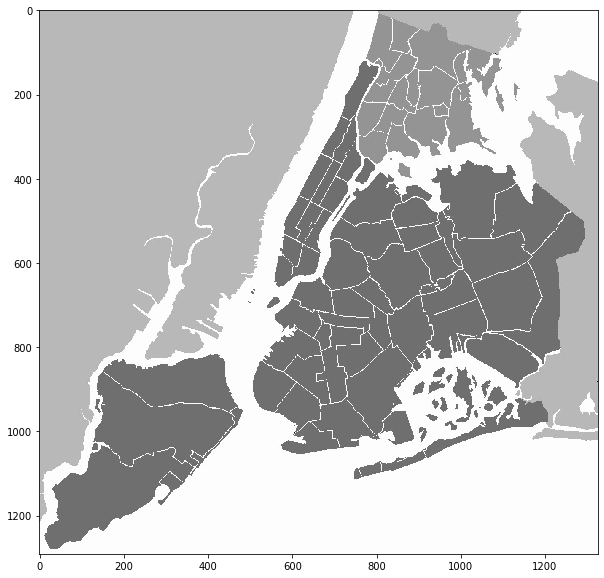

In [5]:
plt.rcParams["figure.figsize"] = (20,10)
nyc = mpimg.imread('New_York_City_.png', 0)
plt.imshow(nyc)
plt.show()

### Transformations 

Vous pouvez transformer les données comme bon vous semble (Data Cleaning - Data Preparation).

In [6]:

# On remplace les NaN de reviews per month par la constant 0 car  a chaque fois qu'on a des NaN pour reviews
# per month
# on a 0 pour last reviews. Pour garder une cérance entre last_review et reviews per month on met les NaN a 0 0

import numpy as np
from sklearn.impute import SimpleImputer

SI = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value= 0
        )

data = SI.fit_transform([AB_NYC_2019['reviews_per_month']])

# affectation du resulat dans le dataframe
AB_NYC_2019['reviews_per_month'] = data[0]

In [7]:
AB_NYC_2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Exploratory Data Analysis

### Questions requises

Pour chacune de ces questions, il vous est demandé d'analyser finement et de conserver et commenter les analyses / graphiques qui vous semblent pertinents.

#### Description des variables

Analysez et commentez les distributions des valeurs prises par les variables catégorielles et quantitatives.

In [8]:
import seaborn as sns

In [9]:
AB_NYC_2019.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
AB_NYC_2019.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Text(0, 0.5, 'normalized counts')

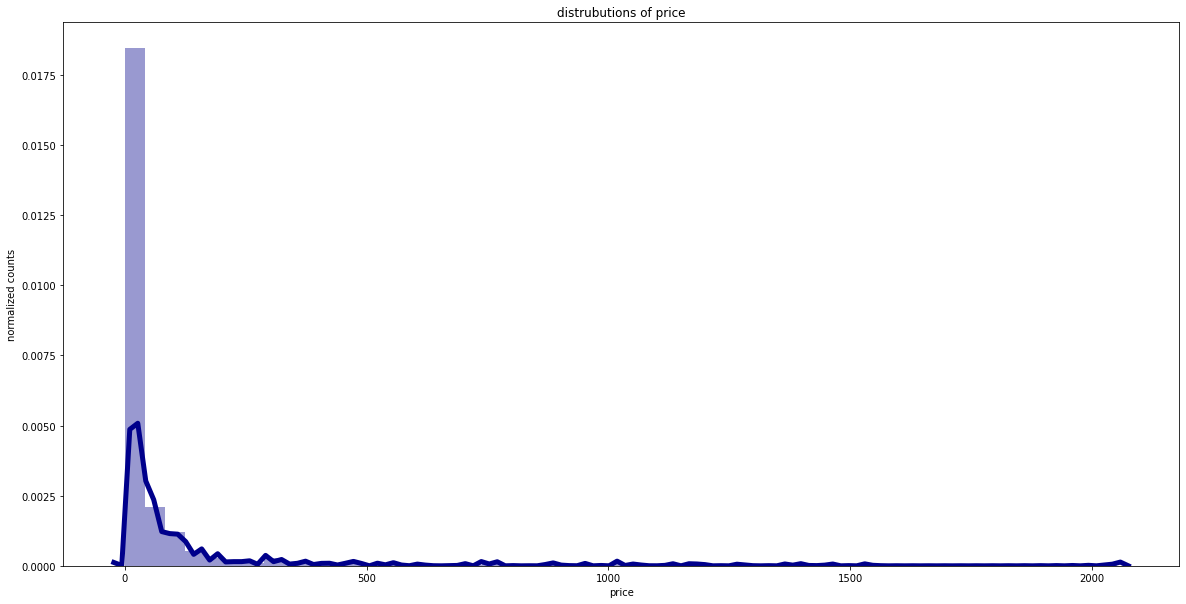

In [11]:
a = AB_NYC_2019['price'].value_counts()
sns.distplot(list(a),
             color = 'darkblue',
             #hist=False,
             kde_kws={'linewidth': 5})
plt.title('distrubutions of price')
plt.xlabel('price')
plt.ylabel('normalized counts')

Text(0, 0.5, 'normalized counts')

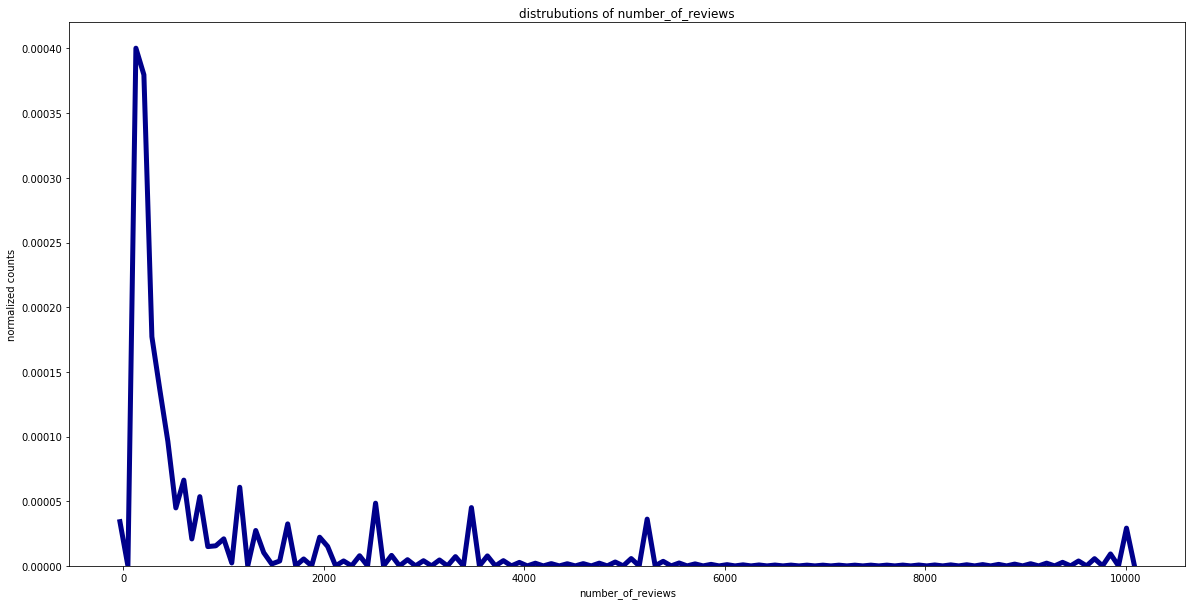

In [12]:
a = AB_NYC_2019['number_of_reviews'].value_counts()
sns.distplot(list(a),
             hist=False,
             color = 'darkblue',
             kde_kws={'linewidth': 5})
plt.title('distrubutions of number_of_reviews')
plt.xlabel('number_of_reviews')
plt.ylabel('normalized counts')

#### Impact sur le prix 

Analysez et commentez le rôle joué par les différentes variables sur le prix de location.

Text(0, 0.5, 'normalized counts')

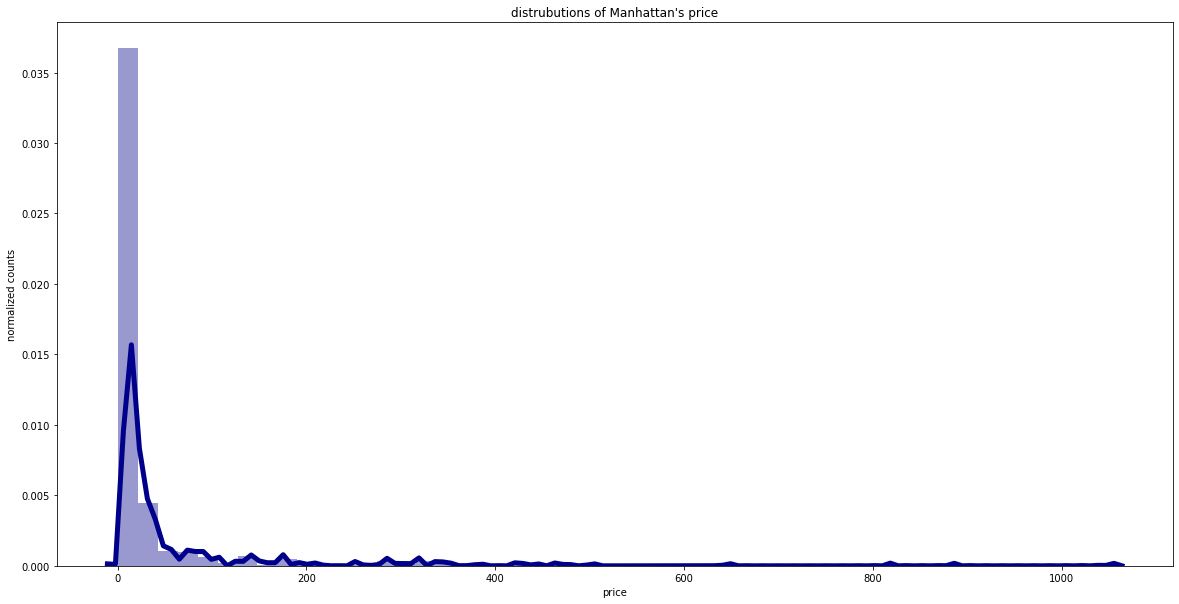

In [13]:
a = AB_NYC_2019[AB_NYC_2019.neighbourhood_group =='Manhattan'].price.value_counts()
sns.distplot(list(a),
             color = 'darkblue',
             #hist=False,
             kde_kws={'linewidth': 5})
plt.title('distrubutions of Manhattan\'s price')
plt.xlabel('price')
plt.ylabel('normalized counts')

Text(0, 0.5, 'normalized counts')

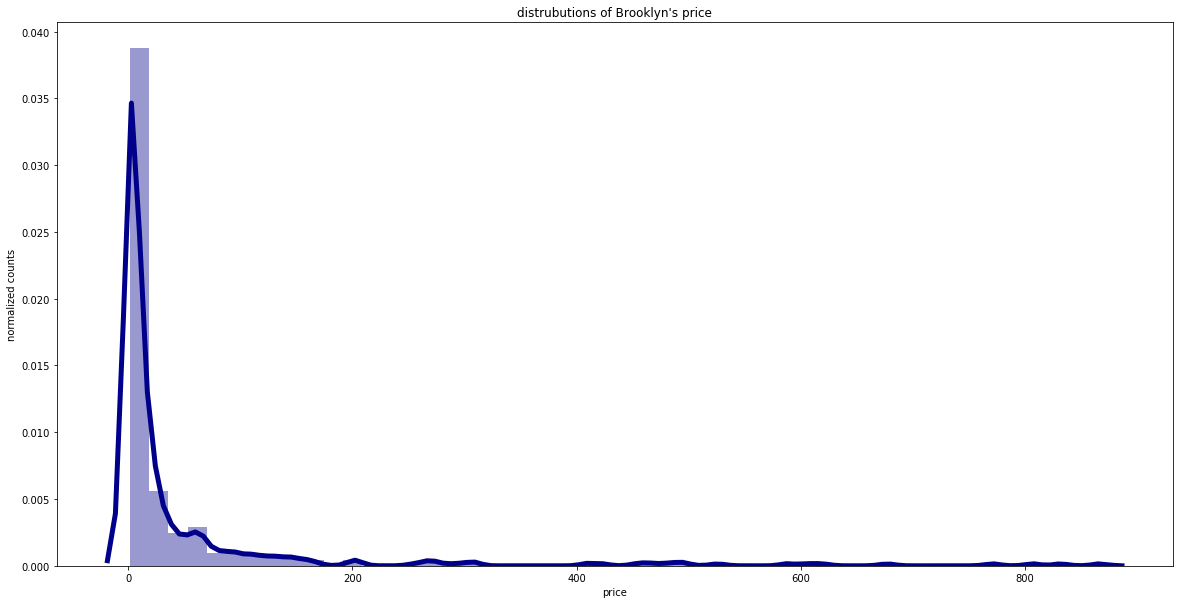

In [14]:
a = AB_NYC_2019[AB_NYC_2019.neighbourhood_group =='Brooklyn'].price.value_counts()
sns.distplot(list(a),
             color = 'darkblue',
             #hist=False,
             kde_kws={'linewidth': 5})
plt.title('distrubutions of Brooklyn\'s price')
plt.xlabel('price')
plt.ylabel('normalized counts')

Text(0, 0.5, 'normalized counts')

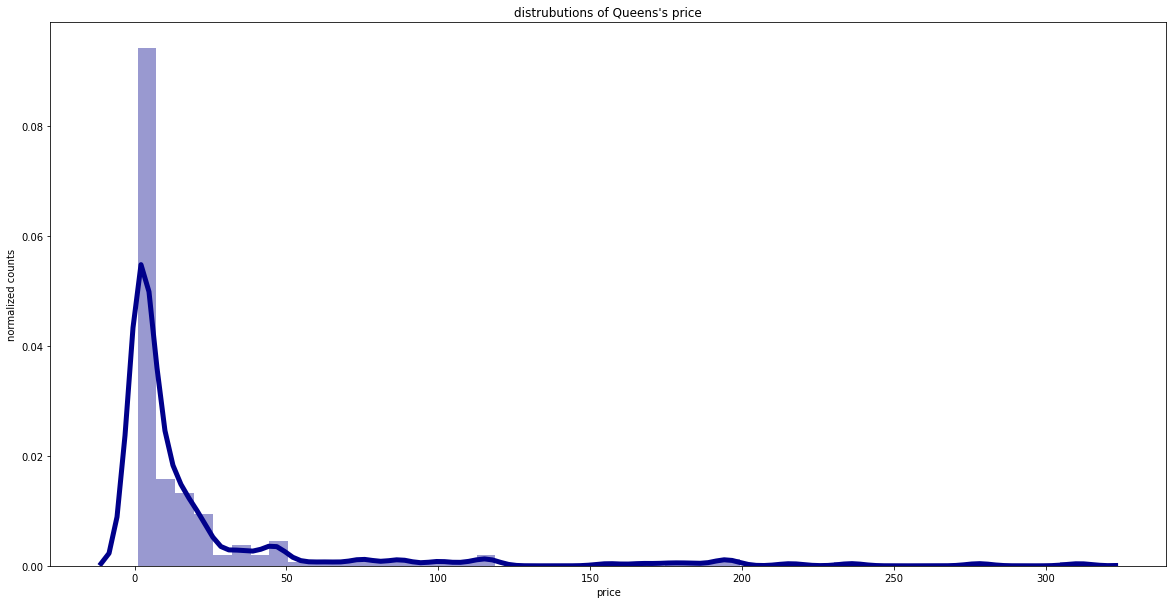

In [15]:
a = AB_NYC_2019[AB_NYC_2019.neighbourhood_group =='Queens'].price.value_counts()
sns.distplot(list(a),
             color = 'darkblue',
             #hist=False,
             kde_kws={'linewidth': 5})
plt.title('distrubutions of Queens\'s price')
plt.xlabel('price')
plt.ylabel('normalized counts')

Text(0, 0.5, 'normalized counts')

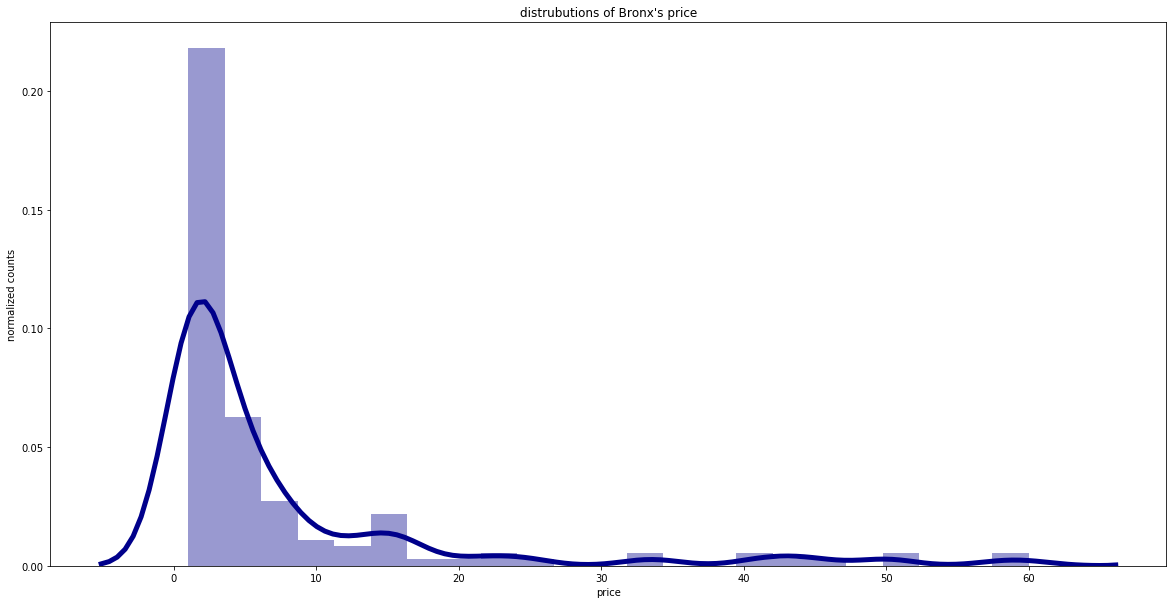

In [16]:
a = AB_NYC_2019[AB_NYC_2019.neighbourhood_group =='Bronx'].price.value_counts()
sns.distplot(list(a),
             color = 'darkblue',
             #hist=False,
             kde_kws={'linewidth': 5})
plt.title('distrubutions of Bronx\'s price')
plt.xlabel('price')
plt.ylabel('normalized counts')

Text(0, 0.5, 'normalized counts')

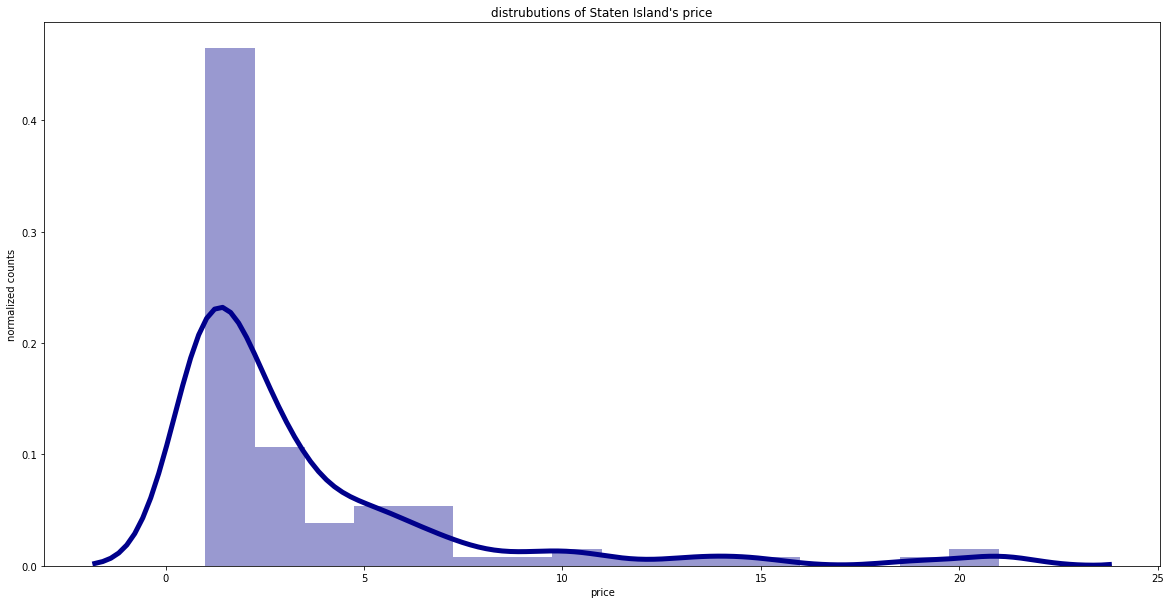

In [17]:
a = AB_NYC_2019[AB_NYC_2019.neighbourhood_group =='Staten Island'].price.value_counts()
sns.distplot(list(a),
             color = 'darkblue',
             #hist=False,
             kde_kws={'linewidth': 5})
plt.title('distrubutions of Staten Island\'s price')
plt.xlabel('price')
plt.ylabel('normalized counts')

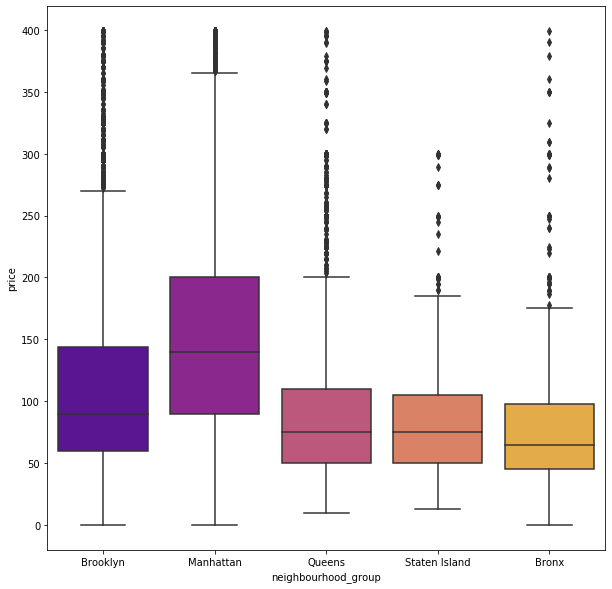

In [18]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=AB_NYC_2019[AB_NYC_2019.price < 400], x='neighbourhood_group',y='price',palette='plasma')

In [19]:
#hesitation host name comment le transformer en numerique
columns = ['host_name','last_review']
df = AB_NYC_2019.drop(columns,axis=1)

Text(0, 0.5, 'normalized counts')

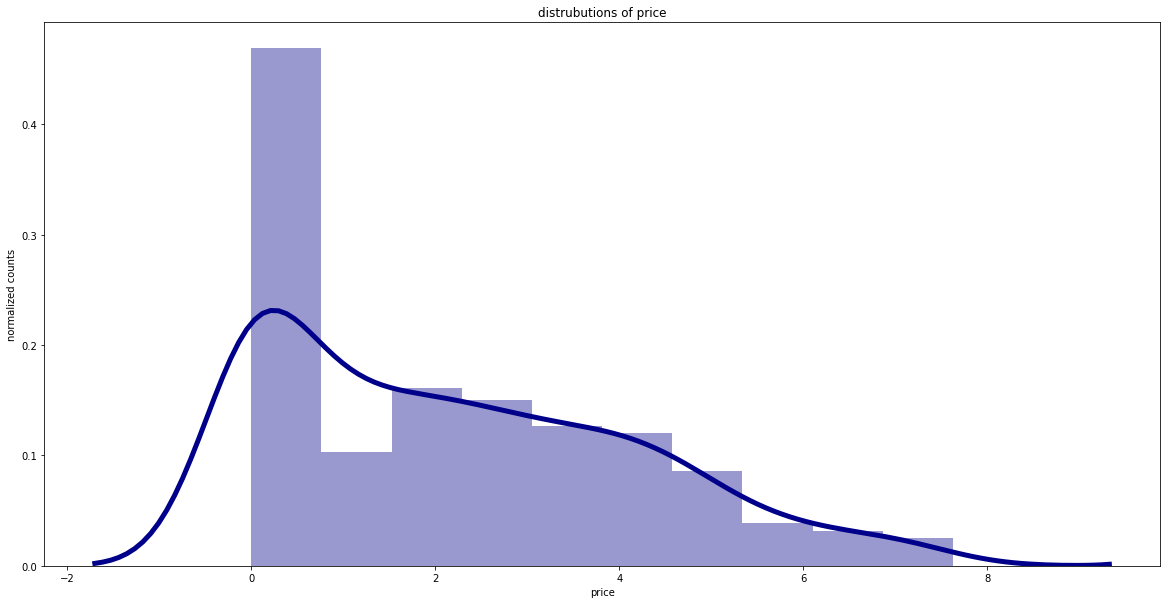

In [20]:
a = AB_NYC_2019['price'].value_counts()
sns.distplot(list(np.log(a)),
             color = 'darkblue',
             #hist=False,
             kde_kws={'linewidth': 5})
plt.title('distrubutions of price')
plt.xlabel('price')
plt.ylabel('normalized counts')

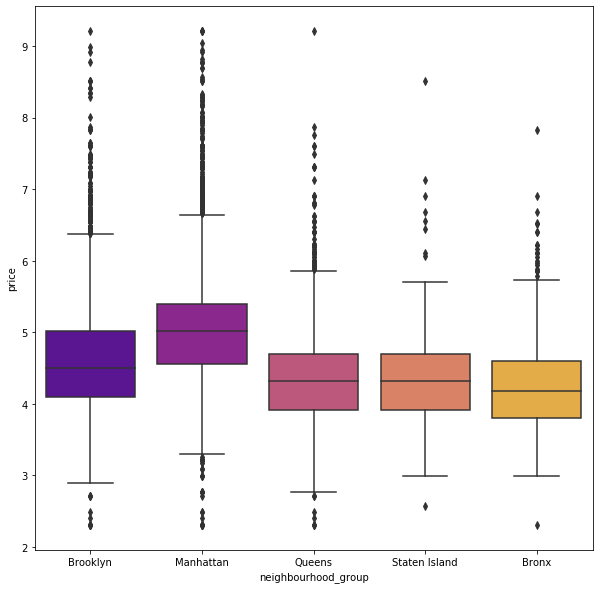

In [21]:
plt.figure(figsize=(10,10))
df['price'] = df.price.apply(lambda x: np.log(x))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='price',palette='plasma')

#### Corrélations 

Analysez et commentez les corrélations entre les différentes variables (quantitatives ? catégorielles ?).

In [22]:
AB_NYC_2019.corr().style.background_gradient(cmap='coolwarm')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1,0.58829,-0.00312529,0.0909085,0.0106187,-0.0132245,-0.31976,0.180221,0.133272,0.0854676
host_id,0.58829,1,0.0202242,0.127055,0.0153091,-0.0173643,-0.140106,0.209783,0.15495,0.203492
latitude,-0.00312529,0.0202242,1,0.0847884,0.0339387,0.0248693,-0.0153888,-0.0187577,0.0195174,-0.0109835
longitude,0.0909085,0.127055,0.0847884,1,-0.150019,-0.0627471,0.0590943,0.138516,-0.114713,0.0827307
price,0.0106187,0.0153091,0.0339387,-0.150019,1,0.0427993,-0.0479542,-0.0505641,0.0574717,0.0818288
minimum_nights,-0.0132245,-0.0173643,0.0248693,-0.0627471,0.0427993,1,-0.0801161,-0.124905,0.12796,0.144303
number_of_reviews,-0.31976,-0.140106,-0.0153888,0.0590943,-0.0479542,-0.0801161,1,0.589407,-0.0723761,0.172028
reviews_per_month,0.180221,0.209783,-0.0187577,0.138516,-0.0505641,-0.124905,0.589407,1,-0.0473121,0.163732
calculated_host_listings_count,0.133272,0.15495,0.0195174,-0.114713,0.0574717,0.12796,-0.0723761,-0.0473121,1,0.225701
availability_365,0.0854676,0.203492,-0.0109835,0.0827307,0.0818288,0.144303,0.172028,0.163732,0.225701,1


#### Géographie

Proposez une analyse intéressante et visuelle grâce à la carte de NYC.

### Analyses complémentaires 

On peut faire une analyse des mots, prendre le Top N mots et regarder le nombre de clic (number of reviews ) en fonction du Top N mots pour essayer de constater que les mots influencent sur les anonces

## Prédiction du prix 

### Preprocessing

Vous pouvez préprocesser les données / créer des nouvelles variables pertinentes.

In [23]:
df = pd.get_dummies(data=df,columns=['neighbourhood_group','room_type'])


In [24]:
df.drop(['neighbourhood','name'],axis=1,inplace=True)

In [25]:
df.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,2787,40.64749,-73.97237,5.003946,1,9,0.21,6,365,0,1,0,0,0,0,1,0
1,2595,2845,40.75362,-73.98377,5.416100,1,45,0.38,2,355,0,0,1,0,0,1,0,0
2,3647,4632,40.80902,-73.94190,5.010635,3,0,0.00,1,365,0,0,1,0,0,0,1,0
3,3831,4869,40.68514,-73.95976,4.488636,1,270,4.64,1,194,0,1,0,0,0,1,0,0
4,5022,7192,40.79851,-73.94399,4.382027,10,9,0.10,1,0,0,0,1,0,0,1,0,0


In [26]:
df.price.describe()

count    4.889500e+04
mean             -inf
std               NaN
min              -inf
25%      4.234107e+00
50%      4.663439e+00
75%      5.164786e+00
max      9.210340e+00
Name: price, dtype: float64

In [27]:
# des valeurs des prices vallent - infini ci dessous on drop ces valeurs 
lis = list(df[df.price < 0].index)
df.drop(lis, axis=0,inplace=True)

### Modèles

Vous devrez tester différents models (en appliquant un split Train Test à 70%) pour comparer leurs précisions (Root Mean Square Error - RMSE) et les discriminer (Bayesian Information Criteria - BIC).

Il vous est demandé de traiter a minima un modèle linéaire, et un modèle à base d'arbres. Cherchez également à analyser l'importance des différentes variables dans vos modèles.

In [28]:
features = list(df.columns)
features.remove('price')
reponse = ['price']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[features],df[reponse],test_size=0.3)

In [30]:
# modele lineaire
from sklearn.linear_model import LinearRegression
lireg = LinearRegression()
lireg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# Modele à base d' arbre
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=3)
model.fit(X_train,y_train)

C:\Users\osman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### Modèle selectionné et résultats

Expliquez ici pourquoi vous choisissez un certain modèle et ses résultats.

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
# rmse pour le modele lineaire
np.sqrt(
    mean_squared_error(
        np.exp(lireg.predict(X_test)),
        np.exp(y_test)
    )
)

218.38516537755652

In [34]:
# rmse pour le modele a base d'arbre
np.sqrt(
    mean_squared_error(
        np.exp(model.predict(X_test)),
        np.exp(y_test)
    )
)

219.70291446609704

In [35]:
pip install RegscorePy

Note: you may need to restart the kernel to use updated packages.


In [36]:
df.shape

(48884, 18)

In [43]:
from RegscorePy import *
print('bic Random : '+str(bic.bic(np.exp(y_test), np.exp(model.predict(X_test)), 18)))
print('bic linear : '+str(bic.bic(np.exp(y_test), np.exp(lireg.predict(X_test)), 18)))

"""
on a eu un probleme de qu'on arrive pas a résoudre alors que avant il marcher et on voyais que linear 
avait un meilleur bic que celle de random
"""

TypeError: Argument 1 not like an array.